<a href="https://colab.research.google.com/github/seyifalope/Stock-Market-Prediction-Using-LSTM-Deep-Learning-Model-A-Case-Study-on-Shopify-Inc./blob/main/SHOPIFY_STOCK_PREDICTION_USING_LSTM_DEEP_LEARNING_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK MARKET PREDICTION USING DEEP LEARNING MODEL**

This project aims at predicting stock price using LSTM deep learning model. The stock focus for this deep learning analysis will be Shopify Inc (SHOP).

Shopify is a dynamic player in the e-commerce sector that provides a comprehensive e-commerce platform, empowering entreprenuers and businesses to set up and manage their online stores with ease

The selection of predicting Shopify stock is driven by the accelerating trend of e-commerce adoption and as more businesses pivot to online platforms, Shopify stands out as a facilitator of this transition. Its ability to adapt to changing market dynamics and support a diverse range of businesses positions it as an intriguing stock .

In [ ]:
# Importing Necessary Libraries for our Prediction


import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, History
import math
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import numpy as np
import tensorflow as tf

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# fetching Shopify stock data from Yahoo Finance form the period of Janauary 2020 to November 2023
ticker= 'SHOP'
shop= yf.download(ticker, start= "2016-01-01", end="2023-12-1")
shop

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2.542000,2.583500,2.452000,2.572000,2.572000,6018000
2016-01-05,2.550000,2.650000,2.526000,2.531000,2.531000,4182000
2016-01-06,2.495000,2.534000,2.418000,2.530000,2.530000,2566000
2016-01-07,2.500000,2.558000,2.463000,2.467000,2.467000,4160000
2016-01-08,2.500000,2.537000,2.470000,2.493000,2.493000,1374000
...,...,...,...,...,...,...
2023-11-24,70.500000,71.209999,70.230003,70.349998,70.349998,5062800
2023-11-27,71.809998,74.470001,71.079002,73.790001,73.790001,24288900
2023-11-28,72.419998,74.220001,72.199997,73.510002,73.510002,12632000


            Close
Date             
2016-01-04  2.572
2016-01-05  2.531
2016-01-06  2.530
2016-01-07  2.467
2016-01-08  2.493


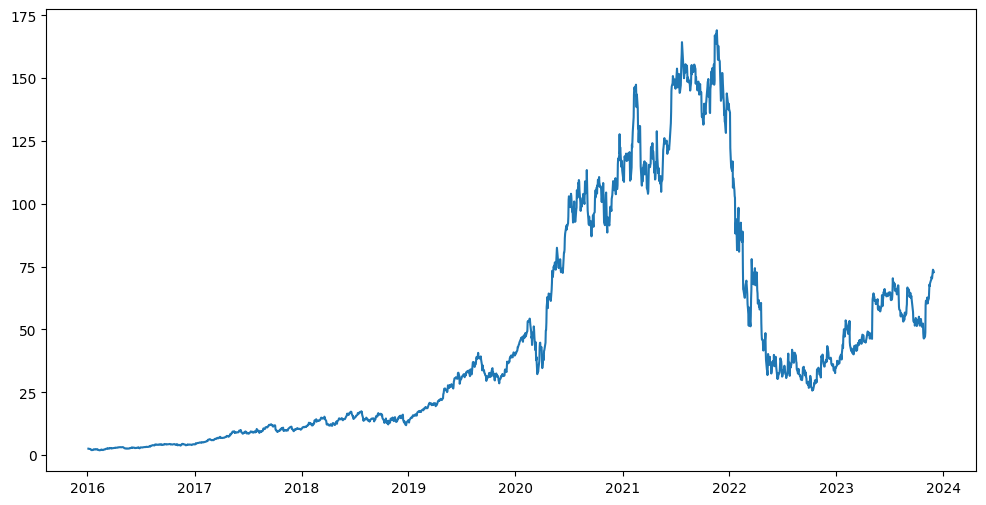

In [ ]:
# Extracting the Closing price column only which we will be using for our prediction
data = shop[['Close']]
print(data.head())


# Exploring the stock data to get insights about the data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])

The graph aboves reveals that Shopify stock has a fluctuating pattern and trend.

It can also be deduced from the fluctuating pattern that the stock is non stationary in nature which is an important feature for predicting time series data using traditional methods . However, since LSTM model will be used in prediction, we need not worry about that as the model can learn and adapt to non stationary data due to thier ability to capture complex data and dependecies

In [ ]:
# performing descriptive statistics
data.describe()

,Close
count,1992.000000
mean,46.480091
std,44.088219
min,1.933000
25%,11.471750
50%,32.701000
75%,65.805002
max,169.059998


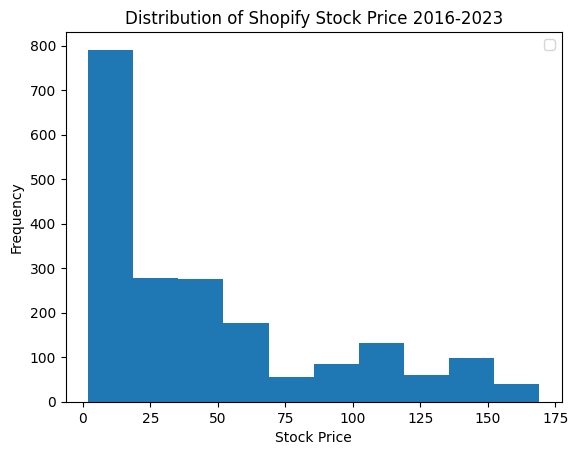

In [ ]:
# Plotting histogram to undertand the distribution of the data

plt.hist(data['Close'])
plt.title('Distribution of Shopify Stock Price 2016-2023')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Performing Feature Engineering on the data to create a year and month columns for data exploration

data['Year']= data.index.year
data['Month']= data.index.strftime('%b')
data['Day'] = data.index.strftime('%a')

<ipython-input-26-62eca9c1d1e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year']= data.index.year
<ipython-input-26-62eca9c1d1e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']= data.index.strftime('%b')
<ipython-input-26-62eca9c1d1e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

                Close  Year Month  Day
Date                                  
2016-01-04   2.572000  2016   Jan  Mon
2016-01-05   2.531000  2016   Jan  Tue
2016-01-06   2.530000  2016   Jan  Wed
2016-01-07   2.467000  2016   Jan  Thu
2016-01-08   2.493000  2016   Jan  Fri
...               ...   ...   ...  ...
2023-11-24  70.349998  2023   Nov  Fri
2023-11-27  73.790001  2023   Nov  Mon
2023-11-28  73.510002  2023   Nov  Tue
2023-11-29  73.330002  2023   Nov  Wed
2023-11-30  72.820000  2023   Nov  Thu

[1992 rows x 4 columns]


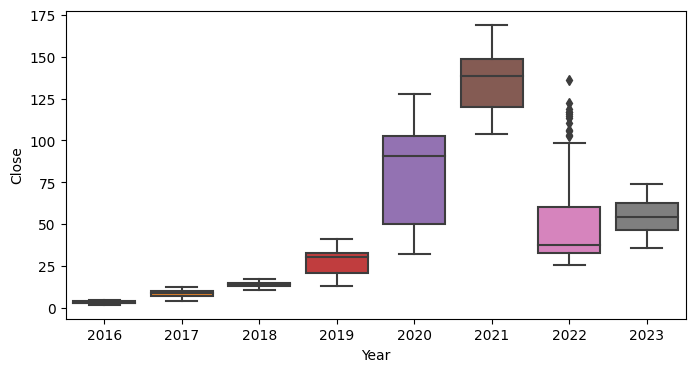

In [ ]:
print(data)

plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='Year', y='Close')
plt.show()

From the boxplot above, we can deduce that the year 2021 has the higest median stock price(higest trend price). and year 2022 experienced the lowest median stock price(lowest trend price)

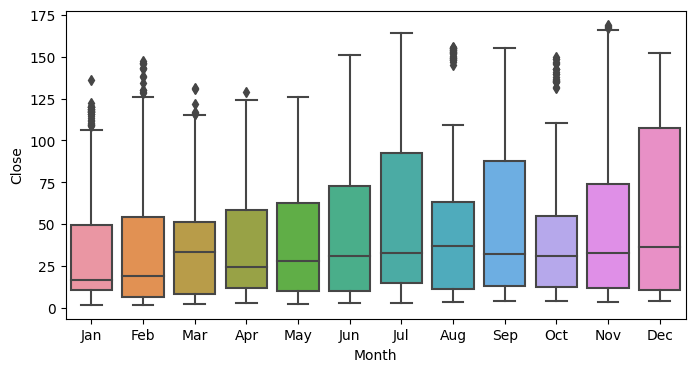

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='Month', y='Close')
plt.show()

From the boxplot above, we can deduce that the median stock price is lowest in the month of January and the higest median stock price is in the month of March and August. which implies that March and August have higest trend price and January has the lowest trend price on average

Good insigts We got from the exploratory analysis. We will now move to preprocessing and make our data suitable for prediction. First, we will scale the data using MinMax Scaler to mormalize our data to be between the values of 0 amd 1 so that there are in uniform range. This is important so that our model will perform optimally

Also, the data will be splitted in a 80-20 ratio, 80% of the data will be used for training our model and the remaing 20% will be used for assessing the performance of our model

In [ ]:
# Selecting only the closing price as that is what will be used for building our model and prediction
data2 = data[['Close']]

# Prepocessing the data so it can be suitable for Deep learning
scaler = MinMaxScaler()
scaled_data =scaler.fit_transform(data2['Close'].values.reshape(-1,1))

# splitting the data into training and testing
train_size = int(len(scaled_data) * 0.80) # size of training data is 80% of the total data
test_size = len(scaled_data) - train_size # size of testing data which will be 20%

#train_data, test_data = scaled_data[:train_size,:], scaled_data[train_size:,:]
train_data,test_data = scaled_data[0:train_size,:],scaled_data[train_size:len(scaled_data),:]
train_data.shape, test_data.shape

scaled_data

array([[0.00382344],
       [0.00357812],
       [0.00357213],
       ...,
       [0.42827911],
       [0.42720209],
       [0.4241505 ]])

LSTM Model deals with sequence of data in prediction. That is the model learns to predict the next values in the sequence based on past data. As a result, the model wont have an explict target column.hence, we will have to create the sequnce in which the model will use past data to predict target values as shown in the next line of code. We will employ the use of timeseriesgenerator for this

In [ ]:
# number of previous time steps(sequence of time) to use before making prediction on the next one
steps=30

#creating a sequence of data that uses 30 past data(X) to make prediction(y)
train_generator= TimeseriesGenerator(train_data,train_data, length=steps, batch_size=20)
test_generator= TimeseriesGenerator(test_data, test_data, length=steps, batch_size=2)

# **BUILDING AND TRAINING THE MODEL**

After defining the sequence of time for our prediction, next step is building our model for prediction as seen below

In [ ]:
# Building a Sequential LSTM Model
model = Sequential()
model.add(LSTM(units=30, return_sequences=True, input_shape=(30,1)))
model.add(LSTM(units=60, return_sequences=True))
model.add(LSTM(units=60))
model.add(Dense(1))

# compiling the model
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mean_absolute_error'])

# Training the model on the training data and assessing  its performance on the validation data
model.fit(train_generator, epochs=75, batch_size=20)



Epoch 1/75
79/79 [==============================] - 5s 10ms/step - loss: 0.0193 - mean_absolute_error: 0.0786
Epoch 2/75
79/79 [==============================] - 1s 9ms/step - loss: 0.0040 - mean_absolute_error: 0.0384
Epoch 3/75
79/79 [==============================] - 1s 9ms/step - loss: 0.0021 - mean_absolute_error: 0.0260
Epoch 4/75
79/79 [==============================] - 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0309
Epoch 5/75
79/79 [==============================] - 1s 17ms/step - loss: 0.0026 - mean_absolute_error: 0.0330
Epoch 6/75
79/79 [==============================] - 2s 22ms/step - loss: 0.0026 - mean_absolute_error: 0.0327
Epoch 7/75
79/79 [==============================] - 1s 17ms/step - loss: 0.0022 - mean_absolute_error: 0.0327
Epoch 8/75
79/79 [==============================] - 1s 18ms/step - loss: 0.0024 - mean_absolute_error: 0.0321
Epoch 9/75
79/79 [==============================] - 1s 13ms/step - loss: 0.0029 - mean_absolute_error: 0.0376
Epoch 10/75


Dispalying the Model Architecture  and Summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 30)            3840      
                                                                 
 lstm_4 (LSTM)               (None, 30, 60)            21840     
                                                                 
 lstm_5 (LSTM)               (None, 60)                29040     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 54781 (213.99 KB)
Trainable params: 54781 (213.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


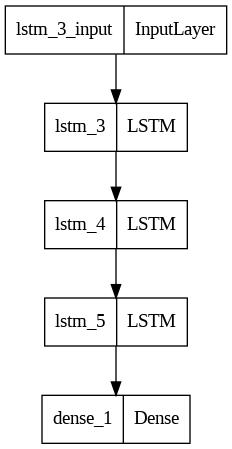

In [ ]:
# Display the model summary
model.summary()

# Plotting the model
plot_model(model)

Having Built our Model and Trained in on our Training data, We will move on to using the model to predict on our test data

In [ ]:
# Predicting on the test data
lstm_predictions = model.predict(test_generator)


185/185 [==============================] - 2s 4ms/step


Recall that to ensure our data are within the same values so that the model will treat all values the same and the larger ones wont dominate the smaller values, we scaled our values to be within 0 and 1 using the MinMaxScaler. Now, we will inverse the values so that our data are in its original form

In [ ]:
# Invert predictions
prediction = scaler.inverse_transform(lstm_predictions)
actual_prices = scaler.inverse_transform(test_data[steps:])


Lets see the predicted and actual values in a tabular format

In [ ]:
# Showcasing shopify actual price vs the predicted price
predict_vs_actual=pd.DataFrame({'Actual stock price': actual_prices.flatten(), 'Predicted stock price':prediction.flatten()})
print(predict_vs_actual)

     Actual stock price  Predicted stock price
0             30.354000              34.342411
1             32.603001              32.185501
2             30.523001              31.734440
3             31.688999              31.272940
4             32.825001              31.333321
..                  ...                    ...
364           70.349998              70.673576
365           73.790001              70.641205
366           73.510002              72.730934
367           73.330002              73.623306
368           72.820000              73.628502

[369 rows x 2 columns]


# **MODEL EVALUATION**

Lets now evaluate the model performance and predictive accuracy using MAE, RMSE and R2

In [ ]:
# Evaluating the model using Mean Absolute Error
mae=mean_absolute_error(actual_prices,prediction)

# Evaluating the model using Root Mean Square Error
mse=mean_squared_error(actual_prices,prediction)
rmse=mse**(1/2)

# Evaluating the model using Root Mean Square Error
r2=r2_score(actual_prices,prediction)

print(f'the Mean Absolute Error: {mae}')
print(f'the Root Mean Square Error is {rmse}')
print(f'the Rsquare is {round(r2 *100)}')


the Mean Absolute Error: 1.6363376421010913
the Root Mean Square Error is 2.280959587481688
the Rsquare is 97


# **Interpreting the evaluation metrics reveals the following:**

*Our Model MAE score of 1.63 indicates that the average difference between the actual and predicted shopify stock price will be $1.81*

*Our Model RMSE score of 2.28 indicates that the average difference between the actual and predicted shopify stock price will be $2.28. it is important to note that RMSE score penalizes large values, hence the larger RMSE score*

*The R^2 scores indicates the predictive power of our model and the degree to which our model explains the variability of our dependent variable. Hence, an R^2 score of 97% indicates that the predictive power of our model is 97% and that 97% of the variance in the dependednt varible is explained by the model *



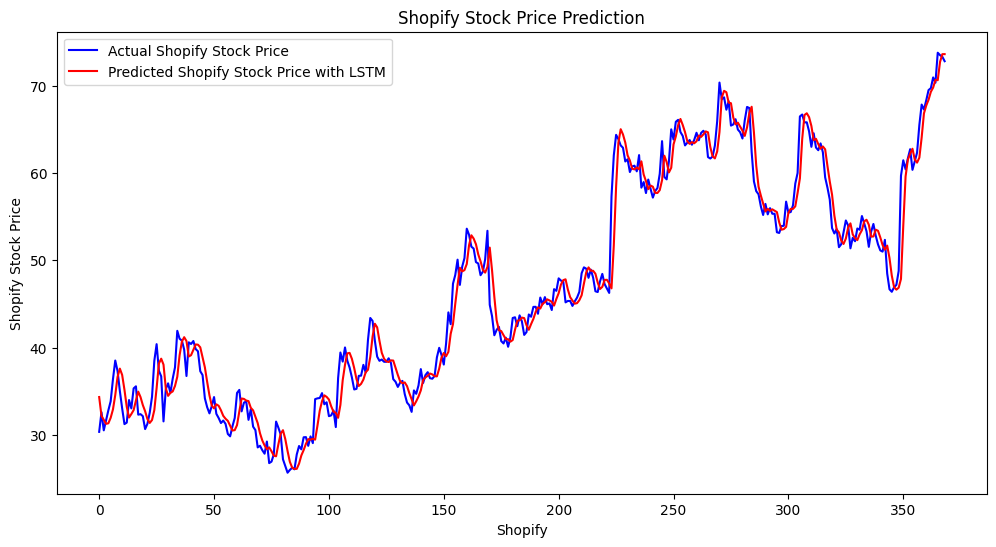

In [ ]:
# Plotting a lineplot to visualize our actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(actual_prices, color='blue', label='Actual Shopify Stock Price')
plt.plot(prediction, color='red', label='Predicted Shopify Stock Price with LSTM')
plt.title('Shopify Stock Price Prediction')
plt.xlabel('Shopify')
plt.ylabel('Shopify Stock Price')
plt.legend()
plt.show()

# **FORECASTING WITH OUR MODEL**

Having build our model and evaluated the performance using the test data, we will now use the model to predict Shopify stock price for the next 60 days

In [ ]:
# Creating a Def Function to predict the next 60 days

def predict_future_days(model, base_data, days_to_predict, scaler, look_back):
    # Start with the last days of the base data
    input_data = base_data[-look_back:].reshape(1, look_back, 1)

    # Predict future days
    future_predictions = []

    for _ in range(days_to_predict):
        # Make a prediction
        prediction = model.predict(input_data)

        # Append the prediction
        future_predictions.append(prediction[0, 0])

        # Update the input data to include the prediction and exclude the oldest data point
        # Correctly reshape the prediction to (1, 1, 1) before appending
        input_data = np.append(input_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    # Invert the scaling
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions


In [ ]:
# Predict next 60 days
look_back=30
days_to_predict = 60
future_days = predict_future_days(model, scaled_data, days_to_predict, scaler, look_back)

# Print and plot the predictions for the next 5 days
#print("Future predictions:", future_days)

1/1 [==============================] - 0s 29ms/step


<ipython-input-40-9f21f568cb88>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  predicted_dates = pd.date_range(start=data.index[-1], periods=days_to_predict + 1, closed='right')


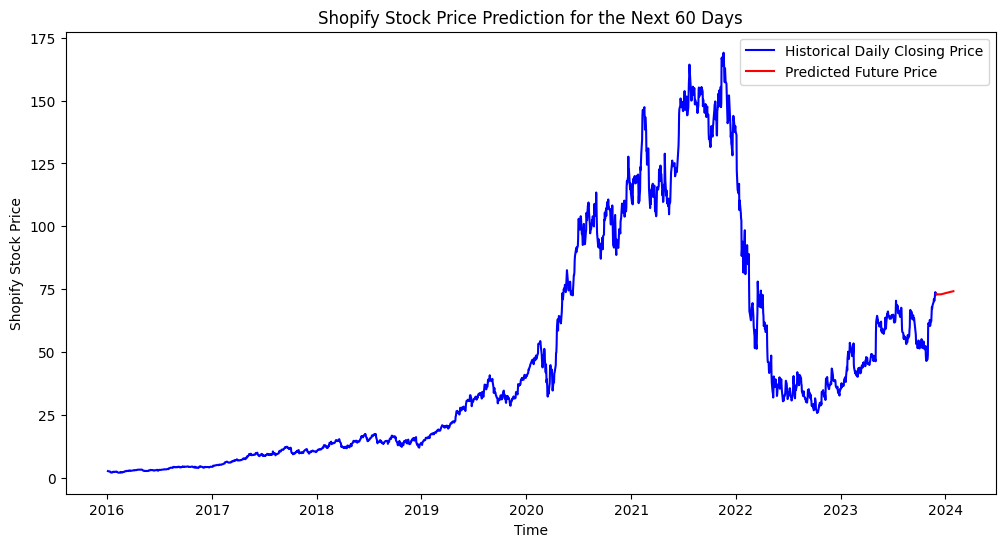

In [ ]:
# Plot the predictions
predicted_dates = pd.date_range(start=data.index[-1], periods=days_to_predict + 1, closed='right')
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], color='blue', label='Historical Daily Closing Price')
plt.plot(predicted_dates, future_days, color='red', label='Predicted Future Price')
plt.title(f'Shopify Stock Price Prediction for the Next {days_to_predict} Days')
plt.xlabel('Time')
plt.ylabel('Shopify Stock Price')
plt.legend()
plt.show()

The outcome of this forecast, as
depicted in the provided visual,
indicates a modest upward trend
for the Shopify stock value